In [1]:
import numpy as np # loads simple numeric analysis package called "numpy", lets us invoke it with abbrev. "np"
import pandas as pd # loads sophisticated data analysis package called "pandas", lets us invoke it with abbrev. "pd"
import matplotlib.pyplot as plt # same but for a library of graphing inspired heavily by MATLAB
%matplotlib inline
    # Tells Python to plot graphs in-line. 
import seaborn as sns # same but for the Seaborn, which is a a sleeker graphing package
from IPython.display import Latex # LaTeX is a pretty useful tool to have for rendering mathematical symbols
from mpl_toolkits import mplot3d # This allows for plotting in R3.

In [18]:
# A bit more-advanced tidying...
# Let's also set Jupyter up so that all results from each cell are printed 
from IPython.core.interactiveshell import InteractiveShell # see here https://archive.ph/QJFOK
InteractiveShell.ast_node_interactivity = "all"

In [100]:
from matplotlib.patches import Ellipse


In [68]:
GSS = pd.read_stata("~/desktop/Python/data/gss2018python.dta")
url = "https://ytliu0.github.io/Stat390EF-R-Independent-Study-archive/RMarkdownExercises/Galton.txt"
galton = pd.read_csv(url, sep = "\t")


/Users/gjmb/anaconda3/lib/python3.9/site-packages/pandas/io/stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


In [78]:
# There are several ways to get these pesky incorrect data-types corrected. Here's one simple one, 
# given by page 176 of VanderPlas (many methods you'll find on Google are more complex).
GSS['educ'] = GSS['educ'].dropna() # We need to drop missing values first
GSS['educ'] = GSS['educ'].astype(float) # Then convert to a float
GSS['educ'].describe()
GSS['paeduc'] = GSS['paeduc'].dropna() 
GSS['paeduc'] = GSS['paeduc'].astype(float)
GSS = GSS.dropna(subset=['educ', 'paeduc'])
GSS.describe()

count    2345.000000
mean       13.731770
std         2.974313
min         0.000000
25%        12.000000
50%        14.000000
75%        16.000000
max        20.000000
Name: educ, dtype: float64

,educ,formwt,id,oversamp,paeduc,version,year
count,1687.000000,1687.0,1687.000000,1687.0,1687.000000,1687.000000,1687.0
mean,14.123296,1.0,1174.059277,1.0,11.883225,2.005928,2018.0
std,2.917444,0.0,680.731570,0.0,4.147774,0.818651,0.0
min,0.000000,1.0,1.000000,1.0,0.000000,1.000000,2018.0
25%,12.000000,1.0,568.500000,1.0,10.000000,1.000000,2018.0
50%,14.000000,1.0,1171.000000,1.0,12.000000,2.000000,2018.0
75%,16.000000,1.0,1771.500000,1.0,14.000000,3.000000,2018.0
max,20.000000,1.0,2348.000000,1.0,20.000000,3.000000,2018.0


(0.0, 20.0)

(0.0, 20.0)

Text(0, 0, '1')

Text(0, 1, '1')

Text(0, 2, '2')

Text(0, 3, '4')

Text(0, 4, '1')

Text(0, 5, '0')

Text(0, 6, '4')

Text(0, 7, '1')

Text(0, 8, '1')

Text(0, 9, '5')

Text(0, 10, '3')

Text(0, 11, '2')

Text(0, 12, '7')

Text(0, 13, '2')

Text(0, 14, '0')

Text(0, 15, '1')

Text(0, 16, '3')

Text(0, 17, '3')

Text(0, 18, '1')

Text(0, 19, '0')

Text(1, 0, '0')

Text(1, 1, '0')

Text(1, 2, '0')

Text(1, 3, '0')

Text(1, 4, '0')

Text(1, 5, '0')

Text(1, 6, '0')

Text(1, 7, '0')

Text(1, 8, '0')

Text(1, 9, '0')

Text(1, 10, '0')

Text(1, 11, '0')

Text(1, 12, '1')

Text(1, 13, '0')

Text(1, 14, '0')

Text(1, 15, '0')

Text(1, 16, '0')

Text(1, 17, '0')

Text(1, 18, '0')

Text(1, 19, '0')

Text(2, 0, '0')

Text(2, 1, '0')

Text(2, 2, '0')

Text(2, 3, '1')

Text(2, 4, '0')

Text(2, 5, '0')

Text(2, 6, '1')

Text(2, 7, '0')

Text(2, 8, '0')

Text(2, 9, '1')

Text(2, 10, '1')

Text(2, 11, '0')

Text(2, 12, '3')

Text(2, 13, '2')

Text(2, 14, '0')

Text(2, 15, '0')

Text(2, 16, '2')

Text(2, 17, '0')

Text(2, 18, '0')

Text(2, 19, '0')

Text(3, 0, '0')

Text(3, 1, '0')

Text(3, 2, '0')

Text(3, 3, '1')

Text(3, 4, '1')

Text(3, 5, '1')

Text(3, 6, '2')

Text(3, 7, '0')

Text(3, 8, '0')

Text(3, 9, '1')

Text(3, 10, '1')

Text(3, 11, '0')

Text(3, 12, '13')

Text(3, 13, '3')

Text(3, 14, '5')

Text(3, 15, '1')

Text(3, 16, '2')

Text(3, 17, '1')

Text(3, 18, '0')

Text(3, 19, '1')

Text(4, 0, '0')

Text(4, 1, '0')

Text(4, 2, '0')

Text(4, 3, '1')

Text(4, 4, '0')

Text(4, 5, '1')

Text(4, 6, '0')

Text(4, 7, '0')

Text(4, 8, '1')

Text(4, 9, '1')

Text(4, 10, '1')

Text(4, 11, '0')

Text(4, 12, '4')

Text(4, 13, '1')

Text(4, 14, '4')

Text(4, 15, '0')

Text(4, 16, '1')

Text(4, 17, '0')

Text(4, 18, '0')

Text(4, 19, '0')

Text(5, 0, '0')

Text(5, 1, '0')

Text(5, 2, '0')

Text(5, 3, '0')

Text(5, 4, '0')

Text(5, 5, '0')

Text(5, 6, '1')

Text(5, 7, '0')

Text(5, 8, '0')

Text(5, 9, '3')

Text(5, 10, '1')

Text(5, 11, '2')

Text(5, 12, '8')

Text(5, 13, '1')

Text(5, 14, '4')

Text(5, 15, '0')

Text(5, 16, '1')

Text(5, 17, '0')

Text(5, 18, '2')

Text(5, 19, '0')

Text(6, 0, '0')

Text(6, 1, '0')

Text(6, 2, '0')

Text(6, 3, '1')

Text(6, 4, '0')

Text(6, 5, '1')

Text(6, 6, '1')

Text(6, 7, '1')

Text(6, 8, '1')

Text(6, 9, '5')

Text(6, 10, '3')

Text(6, 11, '5')

Text(6, 12, '21')

Text(6, 13, '4')

Text(6, 14, '5')

Text(6, 15, '2')

Text(6, 16, '5')

Text(6, 17, '4')

Text(6, 18, '3')

Text(6, 19, '1')

Text(7, 0, '0')

Text(7, 1, '0')

Text(7, 2, '0')

Text(7, 3, '0')

Text(7, 4, '0')

Text(7, 5, '0')

Text(7, 6, '0')

Text(7, 7, '0')

Text(7, 8, '2')

Text(7, 9, '2')

Text(7, 10, '1')

Text(7, 11, '1')

Text(7, 12, '11')

Text(7, 13, '5')

Text(7, 14, '4')

Text(7, 15, '1')

Text(7, 16, '1')

Text(7, 17, '2')

Text(7, 18, '1')

Text(7, 19, '1')

Text(8, 0, '0')

Text(8, 1, '0')

Text(8, 2, '0')

Text(8, 3, '0')

Text(8, 4, '0')

Text(8, 5, '0')

Text(8, 6, '1')

Text(8, 7, '0')

Text(8, 8, '2')

Text(8, 9, '0')

Text(8, 10, '1')

Text(8, 11, '2')

Text(8, 12, '39')

Text(8, 13, '10')

Text(8, 14, '21')

Text(8, 15, '6')

Text(8, 16, '22')

Text(8, 17, '1')

Text(8, 18, '3')

Text(8, 19, '2')

Text(9, 0, '0')

Text(9, 1, '0')

Text(9, 2, '0')

Text(9, 3, '0')

Text(9, 4, '0')

Text(9, 5, '0')

Text(9, 6, '0')

Text(9, 7, '0')

Text(9, 8, '0')

Text(9, 9, '4')

Text(9, 10, '4')

Text(9, 11, '3')

Text(9, 12, '17')

Text(9, 13, '1')

Text(9, 14, '2')

Text(9, 15, '0')

Text(9, 16, '7')

Text(9, 17, '3')

Text(9, 18, '2')

Text(9, 19, '3')

Text(10, 0, '0')

Text(10, 1, '0')

Text(10, 2, '0')

Text(10, 3, '0')

Text(10, 4, '0')

Text(10, 5, '0')

Text(10, 6, '0')

Text(10, 7, '0')

Text(10, 8, '1')

Text(10, 9, '1')

Text(10, 10, '1')

Text(10, 11, '3')

Text(10, 12, '23')

Text(10, 13, '2')

Text(10, 14, '12')

Text(10, 15, '3')

Text(10, 16, '4')

Text(10, 17, '1')

Text(10, 18, '2')

Text(10, 19, '0')

Text(11, 0, '0')

Text(11, 1, '0')

Text(11, 2, '0')

Text(11, 3, '0')

Text(11, 4, '0')

Text(11, 5, '0')

Text(11, 6, '0')

Text(11, 7, '0')

Text(11, 8, '0')

Text(11, 9, '0')

Text(11, 10, '0')

Text(11, 11, '7')

Text(11, 12, '14')

Text(11, 13, '5')

Text(11, 14, '9')

Text(11, 15, '2')

Text(11, 16, '4')

Text(11, 17, '4')

Text(11, 18, '2')

Text(11, 19, '3')

Text(12, 0, '1')

Text(12, 1, '0')

Text(12, 2, '0')

Text(12, 3, '0')

Text(12, 4, '0')

Text(12, 5, '0')

Text(12, 6, '0')

Text(12, 7, '0')

Text(12, 8, '4')

Text(12, 9, '2')

Text(12, 10, '14')

Text(12, 11, '13')

Text(12, 12, '208')

Text(12, 13, '49')

Text(12, 14, '75')

Text(12, 15, '36')

Text(12, 16, '116')

Text(12, 17, '22')

Text(12, 18, '29')

Text(12, 19, '16')

Text(13, 0, '0')

Text(13, 1, '0')

Text(13, 2, '0')

Text(13, 3, '0')

Text(13, 4, '0')

Text(13, 5, '0')

Text(13, 6, '0')

Text(13, 7, '0')

Text(13, 8, '1')

Text(13, 9, '1')

Text(13, 10, '0')

Text(13, 11, '0')

Text(13, 12, '6')

Text(13, 13, '10')

Text(13, 14, '11')

Text(13, 15, '3')

Text(13, 16, '14')

Text(13, 17, '2')

Text(13, 18, '0')

Text(13, 19, '2')

Text(14, 0, '0')

Text(14, 1, '0')

Text(14, 2, '0')

Text(14, 3, '0')

Text(14, 4, '0')

Text(14, 5, '0')

Text(14, 6, '0')

Text(14, 7, '0')

Text(14, 8, '0')

Text(14, 9, '0')

Text(14, 10, '1')

Text(14, 11, '2')

Text(14, 12, '24')

Text(14, 13, '9')

Text(14, 14, '27')

Text(14, 15, '8')

Text(14, 16, '35')

Text(14, 17, '7')

Text(14, 18, '13')

Text(14, 19, '3')

Text(15, 0, '0')

Text(15, 1, '0')

Text(15, 2, '0')

Text(15, 3, '0')

Text(15, 4, '0')

Text(15, 5, '0')

Text(15, 6, '0')

Text(15, 7, '0')

Text(15, 8, '1')

Text(15, 9, '0')

Text(15, 10, '0')

Text(15, 11, '0')

Text(15, 12, '8')

Text(15, 13, '3')

Text(15, 14, '3')

Text(15, 15, '0')

Text(15, 16, '5')

Text(15, 17, '2')

Text(15, 18, '2')

Text(15, 19, '1')

Text(16, 0, '0')

Text(16, 1, '0')

Text(16, 2, '0')

Text(16, 3, '0')

Text(16, 4, '0')

Text(16, 5, '0')

Text(16, 6, '0')

Text(16, 7, '0')

Text(16, 8, '1')

Text(16, 9, '1')

Text(16, 10, '2')

Text(16, 11, '6')

Text(16, 12, '33')

Text(16, 13, '17')

Text(16, 14, '31')

Text(16, 15, '13')

Text(16, 16, '88')

Text(16, 17, '11')

Text(16, 18, '15')

Text(16, 19, '6')

Text(17, 0, '0')

Text(17, 1, '0')

Text(17, 2, '0')

Text(17, 3, '0')

Text(17, 4, '0')

Text(17, 5, '0')

Text(17, 6, '0')

Text(17, 7, '0')

Text(17, 8, '0')

Text(17, 9, '0')

Text(17, 10, '0')

Text(17, 11, '0')

Text(17, 12, '0')

Text(17, 13, '0')

Text(17, 14, '2')

Text(17, 15, '1')

Text(17, 16, '8')

Text(17, 17, '5')

Text(17, 18, '2')

Text(17, 19, '1')

Text(18, 0, '0')

Text(18, 1, '0')

Text(18, 2, '0')

Text(18, 3, '0')

Text(18, 4, '0')

Text(18, 5, '0')

Text(18, 6, '0')

Text(18, 7, '0')

Text(18, 8, '0')

Text(18, 9, '0')

Text(18, 10, '0')

Text(18, 11, '1')

Text(18, 12, '3')

Text(18, 13, '4')

Text(18, 14, '5')

Text(18, 15, '3')

Text(18, 16, '21')

Text(18, 17, '7')

Text(18, 18, '15')

Text(18, 19, '1')

Text(19, 0, '0')

Text(19, 1, '0')

Text(19, 2, '0')

Text(19, 3, '0')

Text(19, 4, '0')

Text(19, 5, '0')

Text(19, 6, '0')

Text(19, 7, '0')

Text(19, 8, '1')

Text(19, 9, '0')

Text(19, 10, '0')

Text(19, 11, '0')

Text(19, 12, '0')

Text(19, 13, '1')

Text(19, 14, '0')

Text(19, 15, '1')

Text(19, 16, '6')

Text(19, 17, '2')

Text(19, 18, '1')

Text(19, 19, '0')

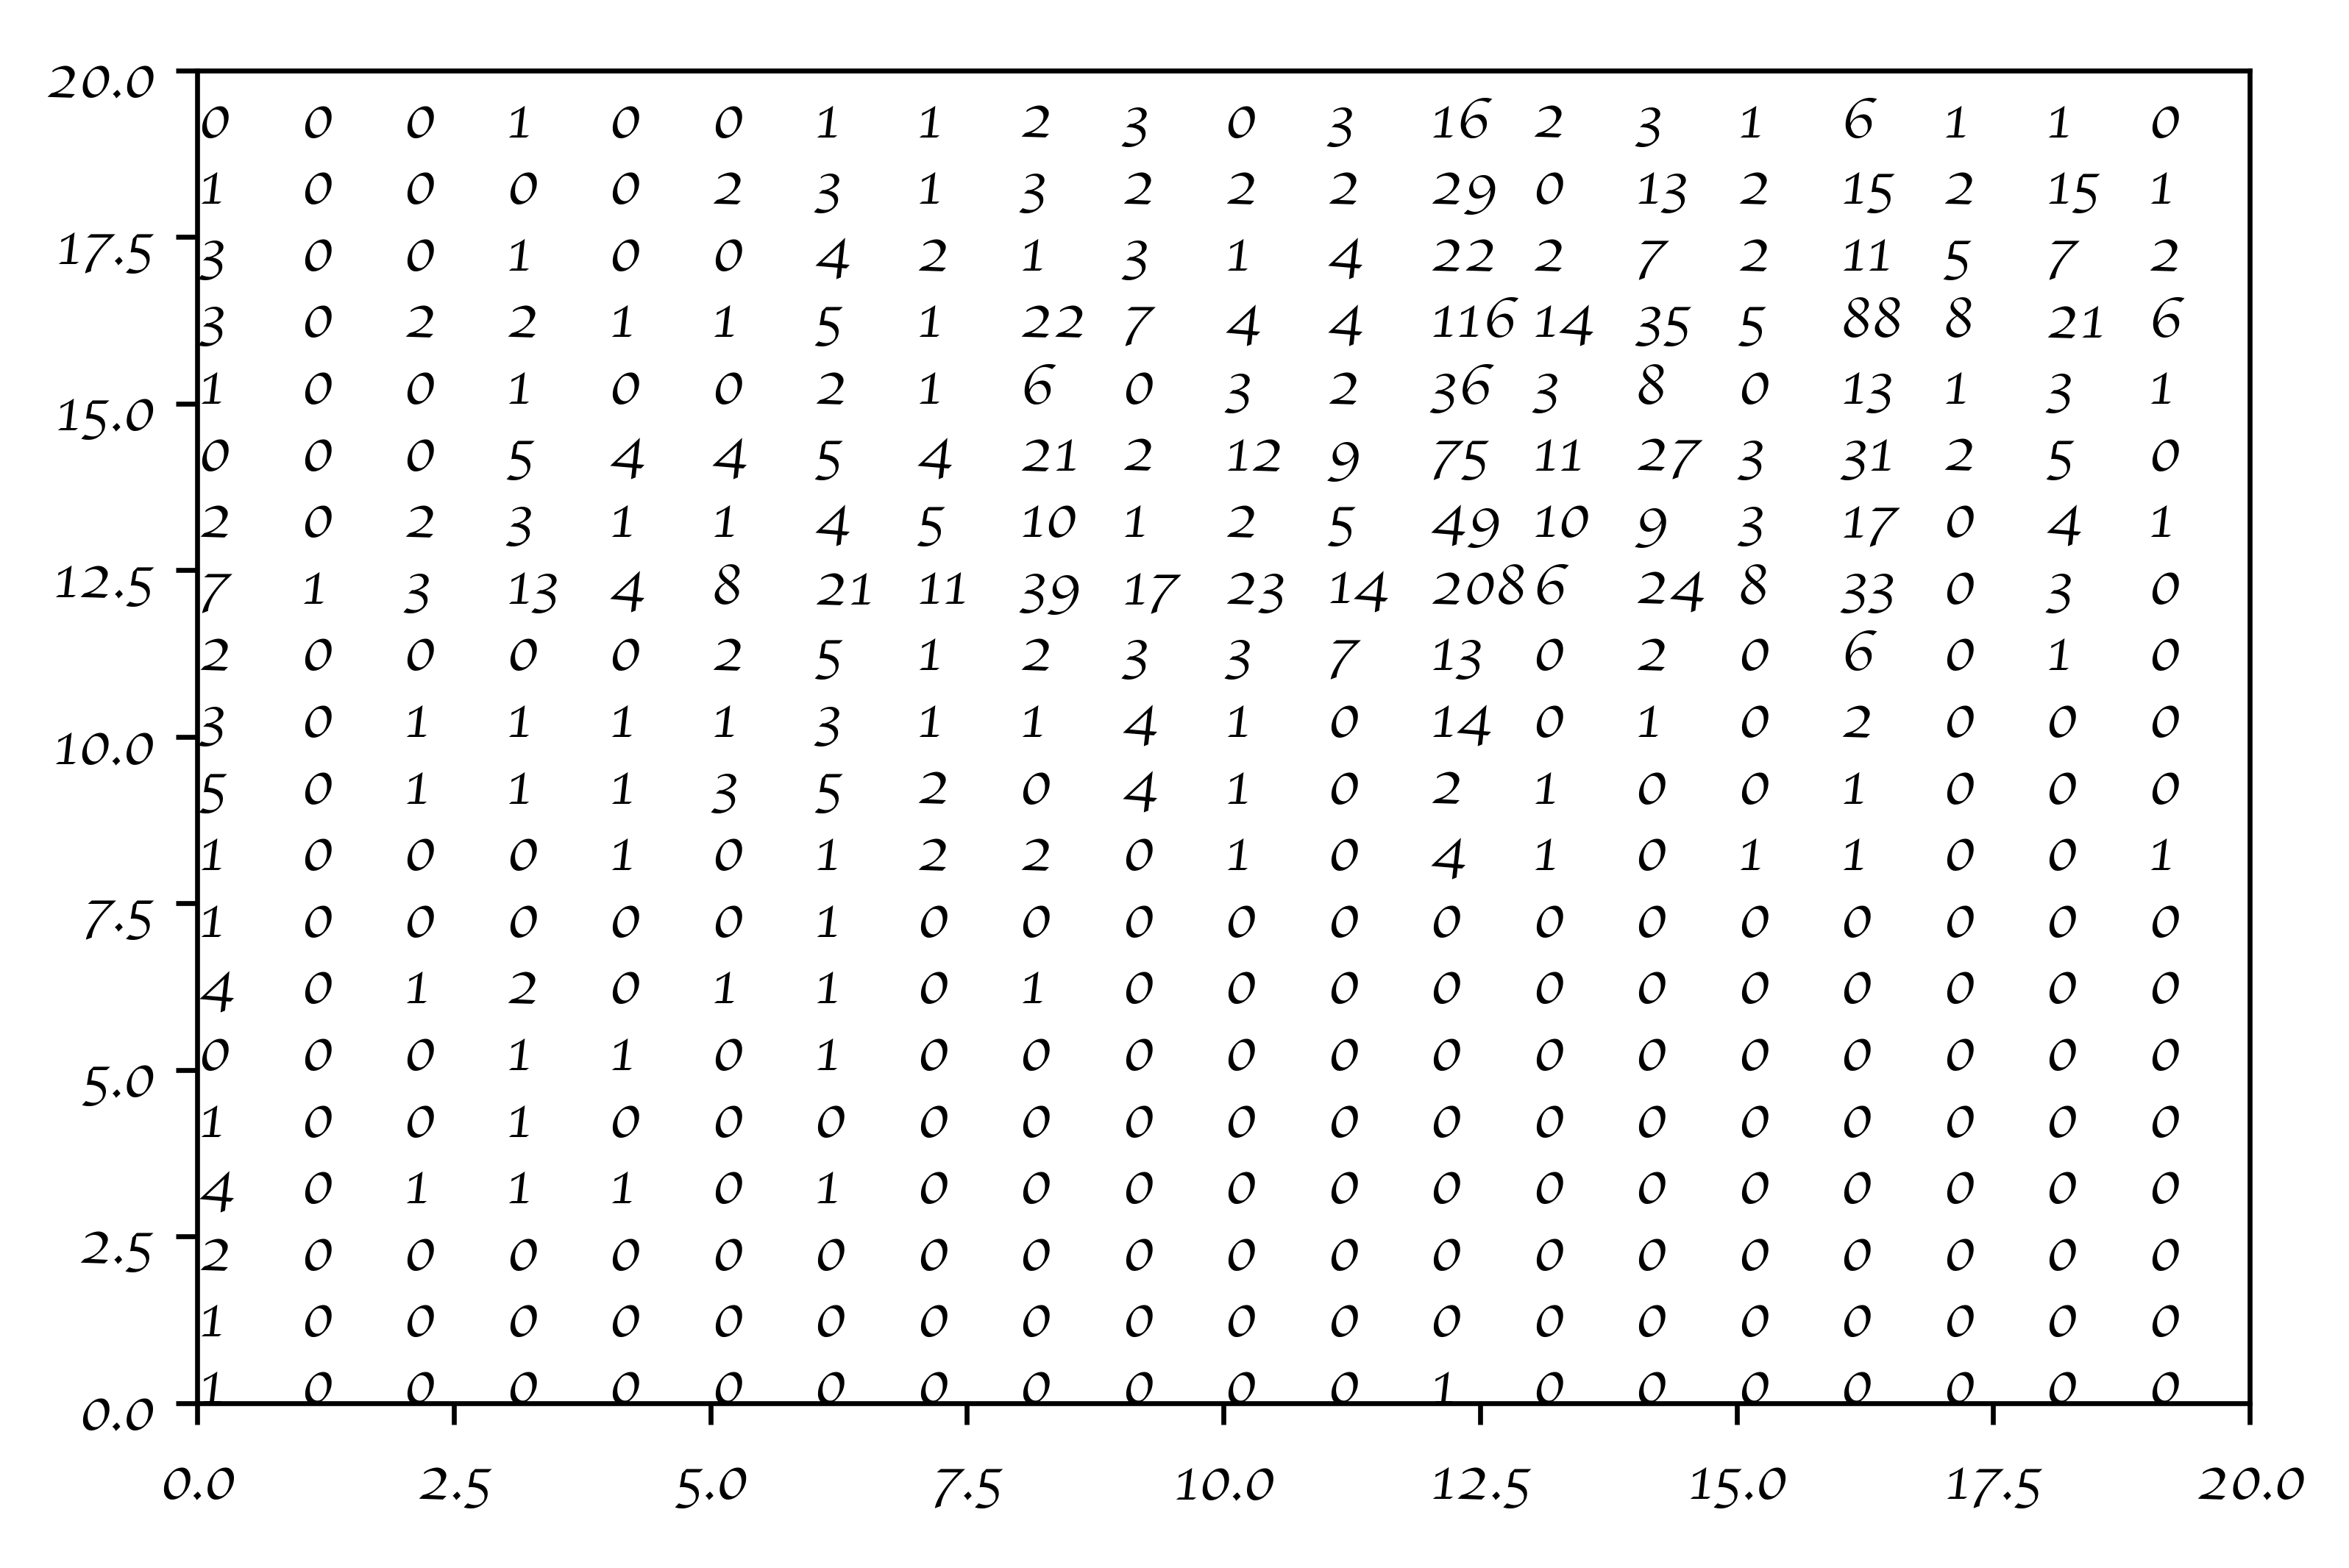

In [81]:
#GSS example
abscissa = GSS["paeduc"]
ordinate = GSS["educ"]
xmin = int(np.min(abscissa))
xmax = int(np.max(abscissa))
ymin = int(np.min(ordinate))
ymax = int(np.max(ordinate))        

plt.rcParams["font.family"] = "cursive"
fig, ax = plt.subplots(dpi=600)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)
for i in range (xmin, xmax):
    for j in range(ymin, ymax):
        dens = str(sum((GSS["paeduc"] == i) & (GSS["educ"] == j)))
        ax.annotate(dens, xy =(i, j), fontsize=10)

(0.0, 20.0)

(0.0, 20.0)

Text(0, 0, '1')

Text(0, 1, '1')

Text(0, 2, '2')

Text(0, 3, '4')

Text(0, 4, '1')

Text(0, 6, '4')

Text(0, 7, '1')

Text(0, 8, '1')

Text(0, 9, '5')

Text(0, 10, '3')

Text(0, 11, '2')

Text(0, 12, '7')

Text(0, 13, '2')

Text(0, 15, '1')

Text(0, 16, '3')

Text(0, 17, '3')

Text(0, 18, '1')

Text(1, 12, '1')

Text(2, 3, '1')

Text(2, 6, '1')

Text(2, 9, '1')

Text(2, 10, '1')

Text(2, 12, '3')

Text(2, 13, '2')

Text(2, 16, '2')

Text(3, 3, '1')

Text(3, 4, '1')

Text(3, 5, '1')

Text(3, 6, '2')

Text(3, 9, '1')

Text(3, 10, '1')

Text(3, 12, '13')

Text(3, 13, '3')

Text(3, 14, '5')

Text(3, 15, '1')

Text(3, 16, '2')

Text(3, 17, '1')

Text(3, 19, '1')

Text(4, 3, '1')

Text(4, 5, '1')

Text(4, 8, '1')

Text(4, 9, '1')

Text(4, 10, '1')

Text(4, 12, '4')

Text(4, 13, '1')

Text(4, 14, '4')

Text(4, 16, '1')

Text(5, 6, '1')

Text(5, 9, '3')

Text(5, 10, '1')

Text(5, 11, '2')

Text(5, 12, '8')

Text(5, 13, '1')

Text(5, 14, '4')

Text(5, 16, '1')

Text(5, 18, '2')

Text(6, 3, '1')

Text(6, 5, '1')

Text(6, 6, '1')

Text(6, 7, '1')

Text(6, 8, '1')

Text(6, 9, '5')

Text(6, 10, '3')

Text(6, 11, '5')

Text(6, 12, '21')

Text(6, 13, '4')

Text(6, 14, '5')

Text(6, 15, '2')

Text(6, 16, '5')

Text(6, 17, '4')

Text(6, 18, '3')

Text(6, 19, '1')

Text(7, 8, '2')

Text(7, 9, '2')

Text(7, 10, '1')

Text(7, 11, '1')

Text(7, 12, '11')

Text(7, 13, '5')

Text(7, 14, '4')

Text(7, 15, '1')

Text(7, 16, '1')

Text(7, 17, '2')

Text(7, 18, '1')

Text(7, 19, '1')

Text(8, 6, '1')

Text(8, 8, '2')

Text(8, 10, '1')

Text(8, 11, '2')

Text(8, 12, '39')

Text(8, 13, '10')

Text(8, 14, '21')

Text(8, 15, '6')

Text(8, 16, '22')

Text(8, 17, '1')

Text(8, 18, '3')

Text(8, 19, '2')

Text(9, 9, '4')

Text(9, 10, '4')

Text(9, 11, '3')

Text(9, 12, '17')

Text(9, 13, '1')

Text(9, 14, '2')

Text(9, 16, '7')

Text(9, 17, '3')

Text(9, 18, '2')

Text(9, 19, '3')

Text(10, 8, '1')

Text(10, 9, '1')

Text(10, 10, '1')

Text(10, 11, '3')

Text(10, 12, '23')

Text(10, 13, '2')

Text(10, 14, '12')

Text(10, 15, '3')

Text(10, 16, '4')

Text(10, 17, '1')

Text(10, 18, '2')

Text(11, 11, '7')

Text(11, 12, '14')

Text(11, 13, '5')

Text(11, 14, '9')

Text(11, 15, '2')

Text(11, 16, '4')

Text(11, 17, '4')

Text(11, 18, '2')

Text(11, 19, '3')

Text(12, 0, '1')

Text(12, 8, '4')

Text(12, 9, '2')

Text(12, 10, '14')

Text(12, 11, '13')

Text(12, 12, '208')

Text(12, 13, '49')

Text(12, 14, '75')

Text(12, 15, '36')

Text(12, 16, '116')

Text(12, 17, '22')

Text(12, 18, '29')

Text(12, 19, '16')

Text(13, 8, '1')

Text(13, 9, '1')

Text(13, 12, '6')

Text(13, 13, '10')

Text(13, 14, '11')

Text(13, 15, '3')

Text(13, 16, '14')

Text(13, 17, '2')

Text(13, 19, '2')

Text(14, 10, '1')

Text(14, 11, '2')

Text(14, 12, '24')

Text(14, 13, '9')

Text(14, 14, '27')

Text(14, 15, '8')

Text(14, 16, '35')

Text(14, 17, '7')

Text(14, 18, '13')

Text(14, 19, '3')

Text(15, 8, '1')

Text(15, 12, '8')

Text(15, 13, '3')

Text(15, 14, '3')

Text(15, 16, '5')

Text(15, 17, '2')

Text(15, 18, '2')

Text(15, 19, '1')

Text(16, 8, '1')

Text(16, 9, '1')

Text(16, 10, '2')

Text(16, 11, '6')

Text(16, 12, '33')

Text(16, 13, '17')

Text(16, 14, '31')

Text(16, 15, '13')

Text(16, 16, '88')

Text(16, 17, '11')

Text(16, 18, '15')

Text(16, 19, '6')

Text(17, 14, '2')

Text(17, 15, '1')

Text(17, 16, '8')

Text(17, 17, '5')

Text(17, 18, '2')

Text(17, 19, '1')

Text(18, 11, '1')

Text(18, 12, '3')

Text(18, 13, '4')

Text(18, 14, '5')

Text(18, 15, '3')

Text(18, 16, '21')

Text(18, 17, '7')

Text(18, 18, '15')

Text(18, 19, '1')

Text(19, 8, '1')

Text(19, 13, '1')

Text(19, 15, '1')

Text(19, 16, '6')

Text(19, 17, '2')

Text(19, 18, '1')

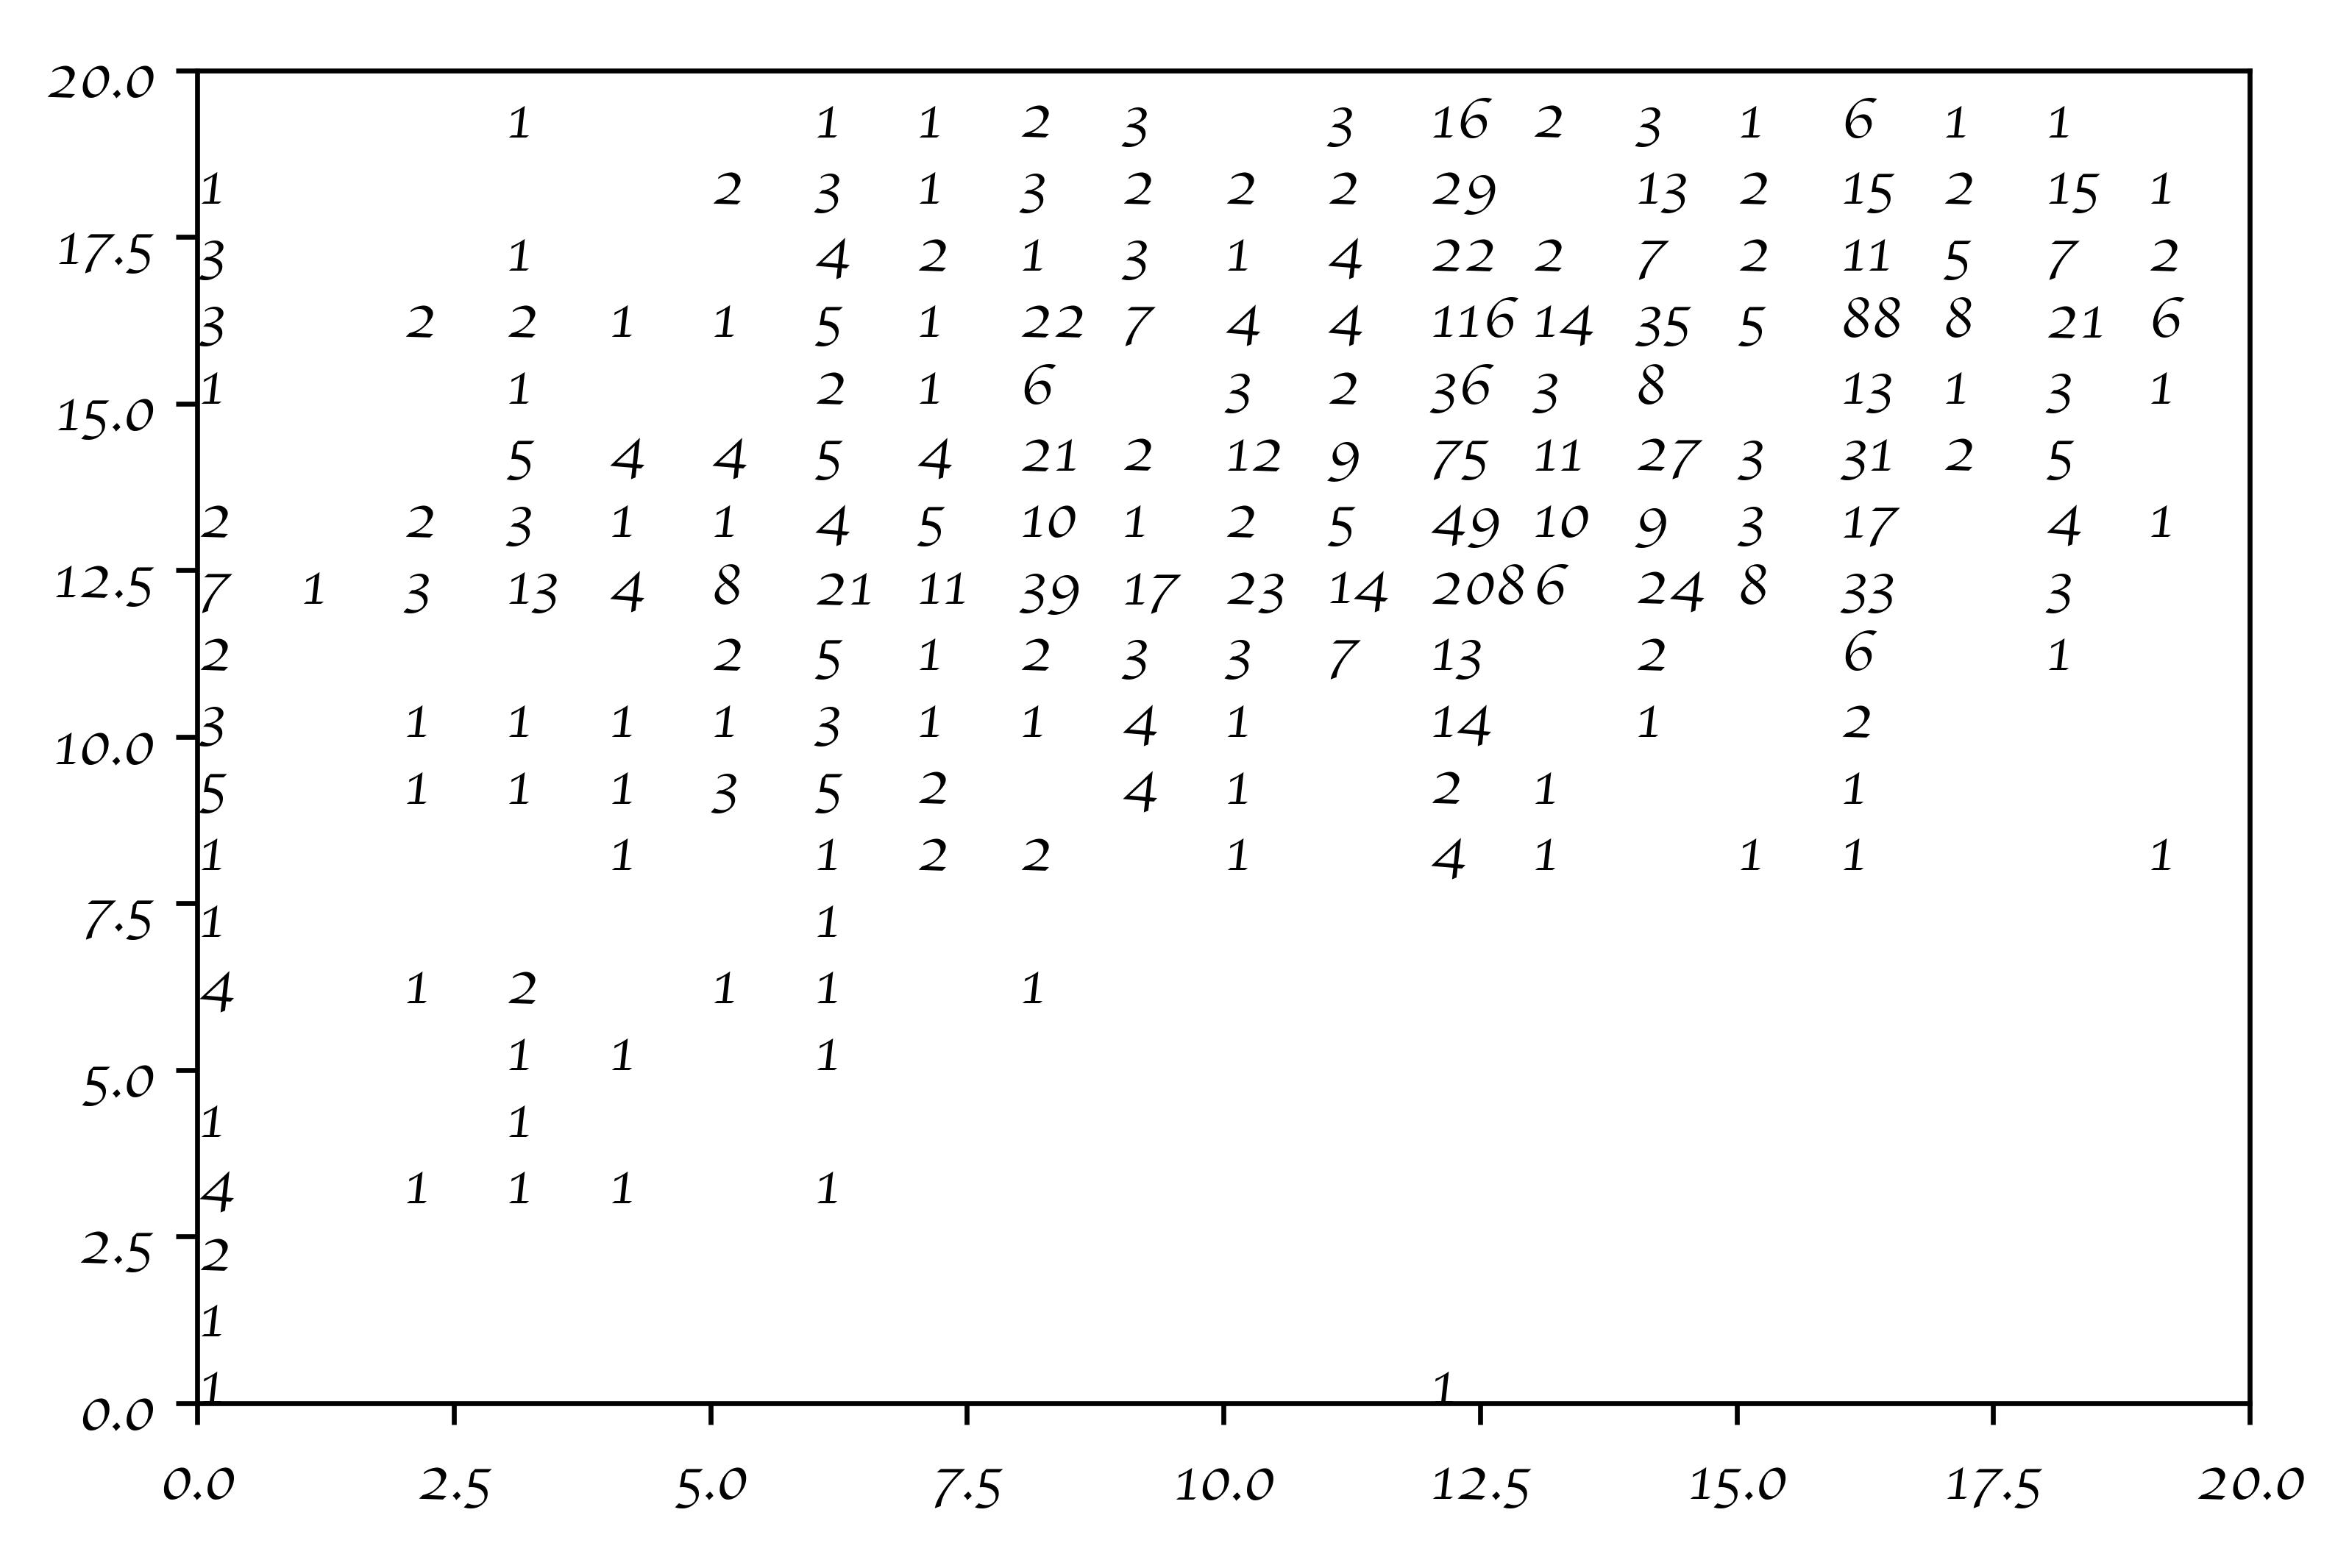

In [105]:
#GSS example
#but omitting zeros
abscissa = GSS["paeduc"]
ordinate = GSS["educ"]
xmin = int(np.min(abscissa))
xmax = int(np.max(abscissa))
ymin = int(np.min(ordinate))
ymax = int(np.max(ordinate))        

plt.rcParams["font.family"] = "cursive"
fig, ax = plt.subplots(dpi=600)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)
for i in range (xmin, xmax):
    for j in range(ymin, ymax):
        dens = sum((GSS["paeduc"] == i) & (GSS["educ"] == j))
        if dens > 0:
            dens = str(sum((GSS["paeduc"] == i) & (GSS["educ"] == j)))
            ax.annotate(dens, xy =(i, j), fontsize=10)

In [102]:
def get_cov_ellipse(cov, centre, nstd, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)

In [108]:
# add ellipse? code looks cool but appears broken: https://archive.ph/CW7Y9#selection-1853.4-1963.1
#GSS example
#but omitting zeros
plt.rcParams["font.family"] = "cursive"
fig, ax = plt.subplots(dpi=600)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)

abscissa = GSS["paeduc"]
ordinate = GSS["educ"]
xmin = int(np.min(abscissa))
xmax = int(np.max(abscissa))
ymin = int(np.min(ordinate))
ymax = int(np.max(ordinate))        
y_mean = np.mean(ordinate)
x_mean = np.mean(abscissa)
cov = np.cov(ordinate, abscissa)
e = get_cov_ellipse(cov, (ordinate, abscissa), 3)
ax.scatter(abscissa, ordinate)
ax.add_artist(e)
plt.show()



for i in range (xmin, xmax):
    for j in range(ymin, ymax):
        dens = sum((GSS["paeduc"] == i) & (GSS["educ"] == j))
        if dens > 0:
            dens = str(sum((GSS["paeduc"] == i) & (GSS["educ"] == j)))
            ax.annotate(dens, xy =(i, j), fontsize=10)
            


(0.0, 20.0)

(0.0, 20.0)

ValueError: setting an array element with a sequence.

<Figure size 3600x2400 with 1 Axes>

<AxesSubplot:xlabel='paeduc', ylabel='educ'>

(0.0, 20.0)

(0.0, 20.0)

Text(0, 0, '1')

Text(0, 1, '1')

Text(0, 2, '2')

Text(0, 3, '4')

Text(0, 4, '1')

Text(0, 6, '4')

Text(0, 7, '1')

Text(0, 8, '1')

Text(0, 9, '5')

Text(0, 10, '3')

Text(0, 11, '2')

Text(0, 12, '7')

Text(0, 13, '2')

Text(0, 15, '1')

Text(0, 16, '3')

Text(0, 17, '3')

Text(0, 18, '1')

Text(1, 12, '1')

Text(2, 3, '1')

Text(2, 6, '1')

Text(2, 9, '1')

Text(2, 10, '1')

Text(2, 12, '3')

Text(2, 13, '2')

Text(2, 16, '2')

Text(3, 3, '1')

Text(3, 4, '1')

Text(3, 5, '1')

Text(3, 6, '2')

Text(3, 9, '1')

Text(3, 10, '1')

Text(3, 12, '13')

Text(3, 13, '3')

Text(3, 14, '5')

Text(3, 15, '1')

Text(3, 16, '2')

Text(3, 17, '1')

Text(3, 19, '1')

Text(4, 3, '1')

Text(4, 5, '1')

Text(4, 8, '1')

Text(4, 9, '1')

Text(4, 10, '1')

Text(4, 12, '4')

Text(4, 13, '1')

Text(4, 14, '4')

Text(4, 16, '1')

Text(5, 6, '1')

Text(5, 9, '3')

Text(5, 10, '1')

Text(5, 11, '2')

Text(5, 12, '8')

Text(5, 13, '1')

Text(5, 14, '4')

Text(5, 16, '1')

Text(5, 18, '2')

Text(6, 3, '1')

Text(6, 5, '1')

Text(6, 6, '1')

Text(6, 7, '1')

Text(6, 8, '1')

Text(6, 9, '5')

Text(6, 10, '3')

Text(6, 11, '5')

Text(6, 12, '21')

Text(6, 13, '4')

Text(6, 14, '5')

Text(6, 15, '2')

Text(6, 16, '5')

Text(6, 17, '4')

Text(6, 18, '3')

Text(6, 19, '1')

Text(7, 8, '2')

Text(7, 9, '2')

Text(7, 10, '1')

Text(7, 11, '1')

Text(7, 12, '11')

Text(7, 13, '5')

Text(7, 14, '4')

Text(7, 15, '1')

Text(7, 16, '1')

Text(7, 17, '2')

Text(7, 18, '1')

Text(7, 19, '1')

Text(8, 6, '1')

Text(8, 8, '2')

Text(8, 10, '1')

Text(8, 11, '2')

Text(8, 12, '39')

Text(8, 13, '10')

Text(8, 14, '21')

Text(8, 15, '6')

Text(8, 16, '22')

Text(8, 17, '1')

Text(8, 18, '3')

Text(8, 19, '2')

Text(9, 9, '4')

Text(9, 10, '4')

Text(9, 11, '3')

Text(9, 12, '17')

Text(9, 13, '1')

Text(9, 14, '2')

Text(9, 16, '7')

Text(9, 17, '3')

Text(9, 18, '2')

Text(9, 19, '3')

Text(10, 8, '1')

Text(10, 9, '1')

Text(10, 10, '1')

Text(10, 11, '3')

Text(10, 12, '23')

Text(10, 13, '2')

Text(10, 14, '12')

Text(10, 15, '3')

Text(10, 16, '4')

Text(10, 17, '1')

Text(10, 18, '2')

Text(11, 11, '7')

Text(11, 12, '14')

Text(11, 13, '5')

Text(11, 14, '9')

Text(11, 15, '2')

Text(11, 16, '4')

Text(11, 17, '4')

Text(11, 18, '2')

Text(11, 19, '3')

Text(12, 0, '1')

Text(12, 8, '4')

Text(12, 9, '2')

Text(12, 10, '14')

Text(12, 11, '13')

Text(12, 12, '208')

Text(12, 13, '49')

Text(12, 14, '75')

Text(12, 15, '36')

Text(12, 16, '116')

Text(12, 17, '22')

Text(12, 18, '29')

Text(12, 19, '16')

Text(13, 8, '1')

Text(13, 9, '1')

Text(13, 12, '6')

Text(13, 13, '10')

Text(13, 14, '11')

Text(13, 15, '3')

Text(13, 16, '14')

Text(13, 17, '2')

Text(13, 19, '2')

Text(14, 10, '1')

Text(14, 11, '2')

Text(14, 12, '24')

Text(14, 13, '9')

Text(14, 14, '27')

Text(14, 15, '8')

Text(14, 16, '35')

Text(14, 17, '7')

Text(14, 18, '13')

Text(14, 19, '3')

Text(15, 8, '1')

Text(15, 12, '8')

Text(15, 13, '3')

Text(15, 14, '3')

Text(15, 16, '5')

Text(15, 17, '2')

Text(15, 18, '2')

Text(15, 19, '1')

Text(16, 8, '1')

Text(16, 9, '1')

Text(16, 10, '2')

Text(16, 11, '6')

Text(16, 12, '33')

Text(16, 13, '17')

Text(16, 14, '31')

Text(16, 15, '13')

Text(16, 16, '88')

Text(16, 17, '11')

Text(16, 18, '15')

Text(16, 19, '6')

Text(17, 14, '2')

Text(17, 15, '1')

Text(17, 16, '8')

Text(17, 17, '5')

Text(17, 18, '2')

Text(17, 19, '1')

Text(18, 11, '1')

Text(18, 12, '3')

Text(18, 13, '4')

Text(18, 14, '5')

Text(18, 15, '3')

Text(18, 16, '21')

Text(18, 17, '7')

Text(18, 18, '15')

Text(18, 19, '1')

Text(19, 8, '1')

Text(19, 13, '1')

Text(19, 15, '1')

Text(19, 16, '6')

Text(19, 17, '2')

Text(19, 18, '1')

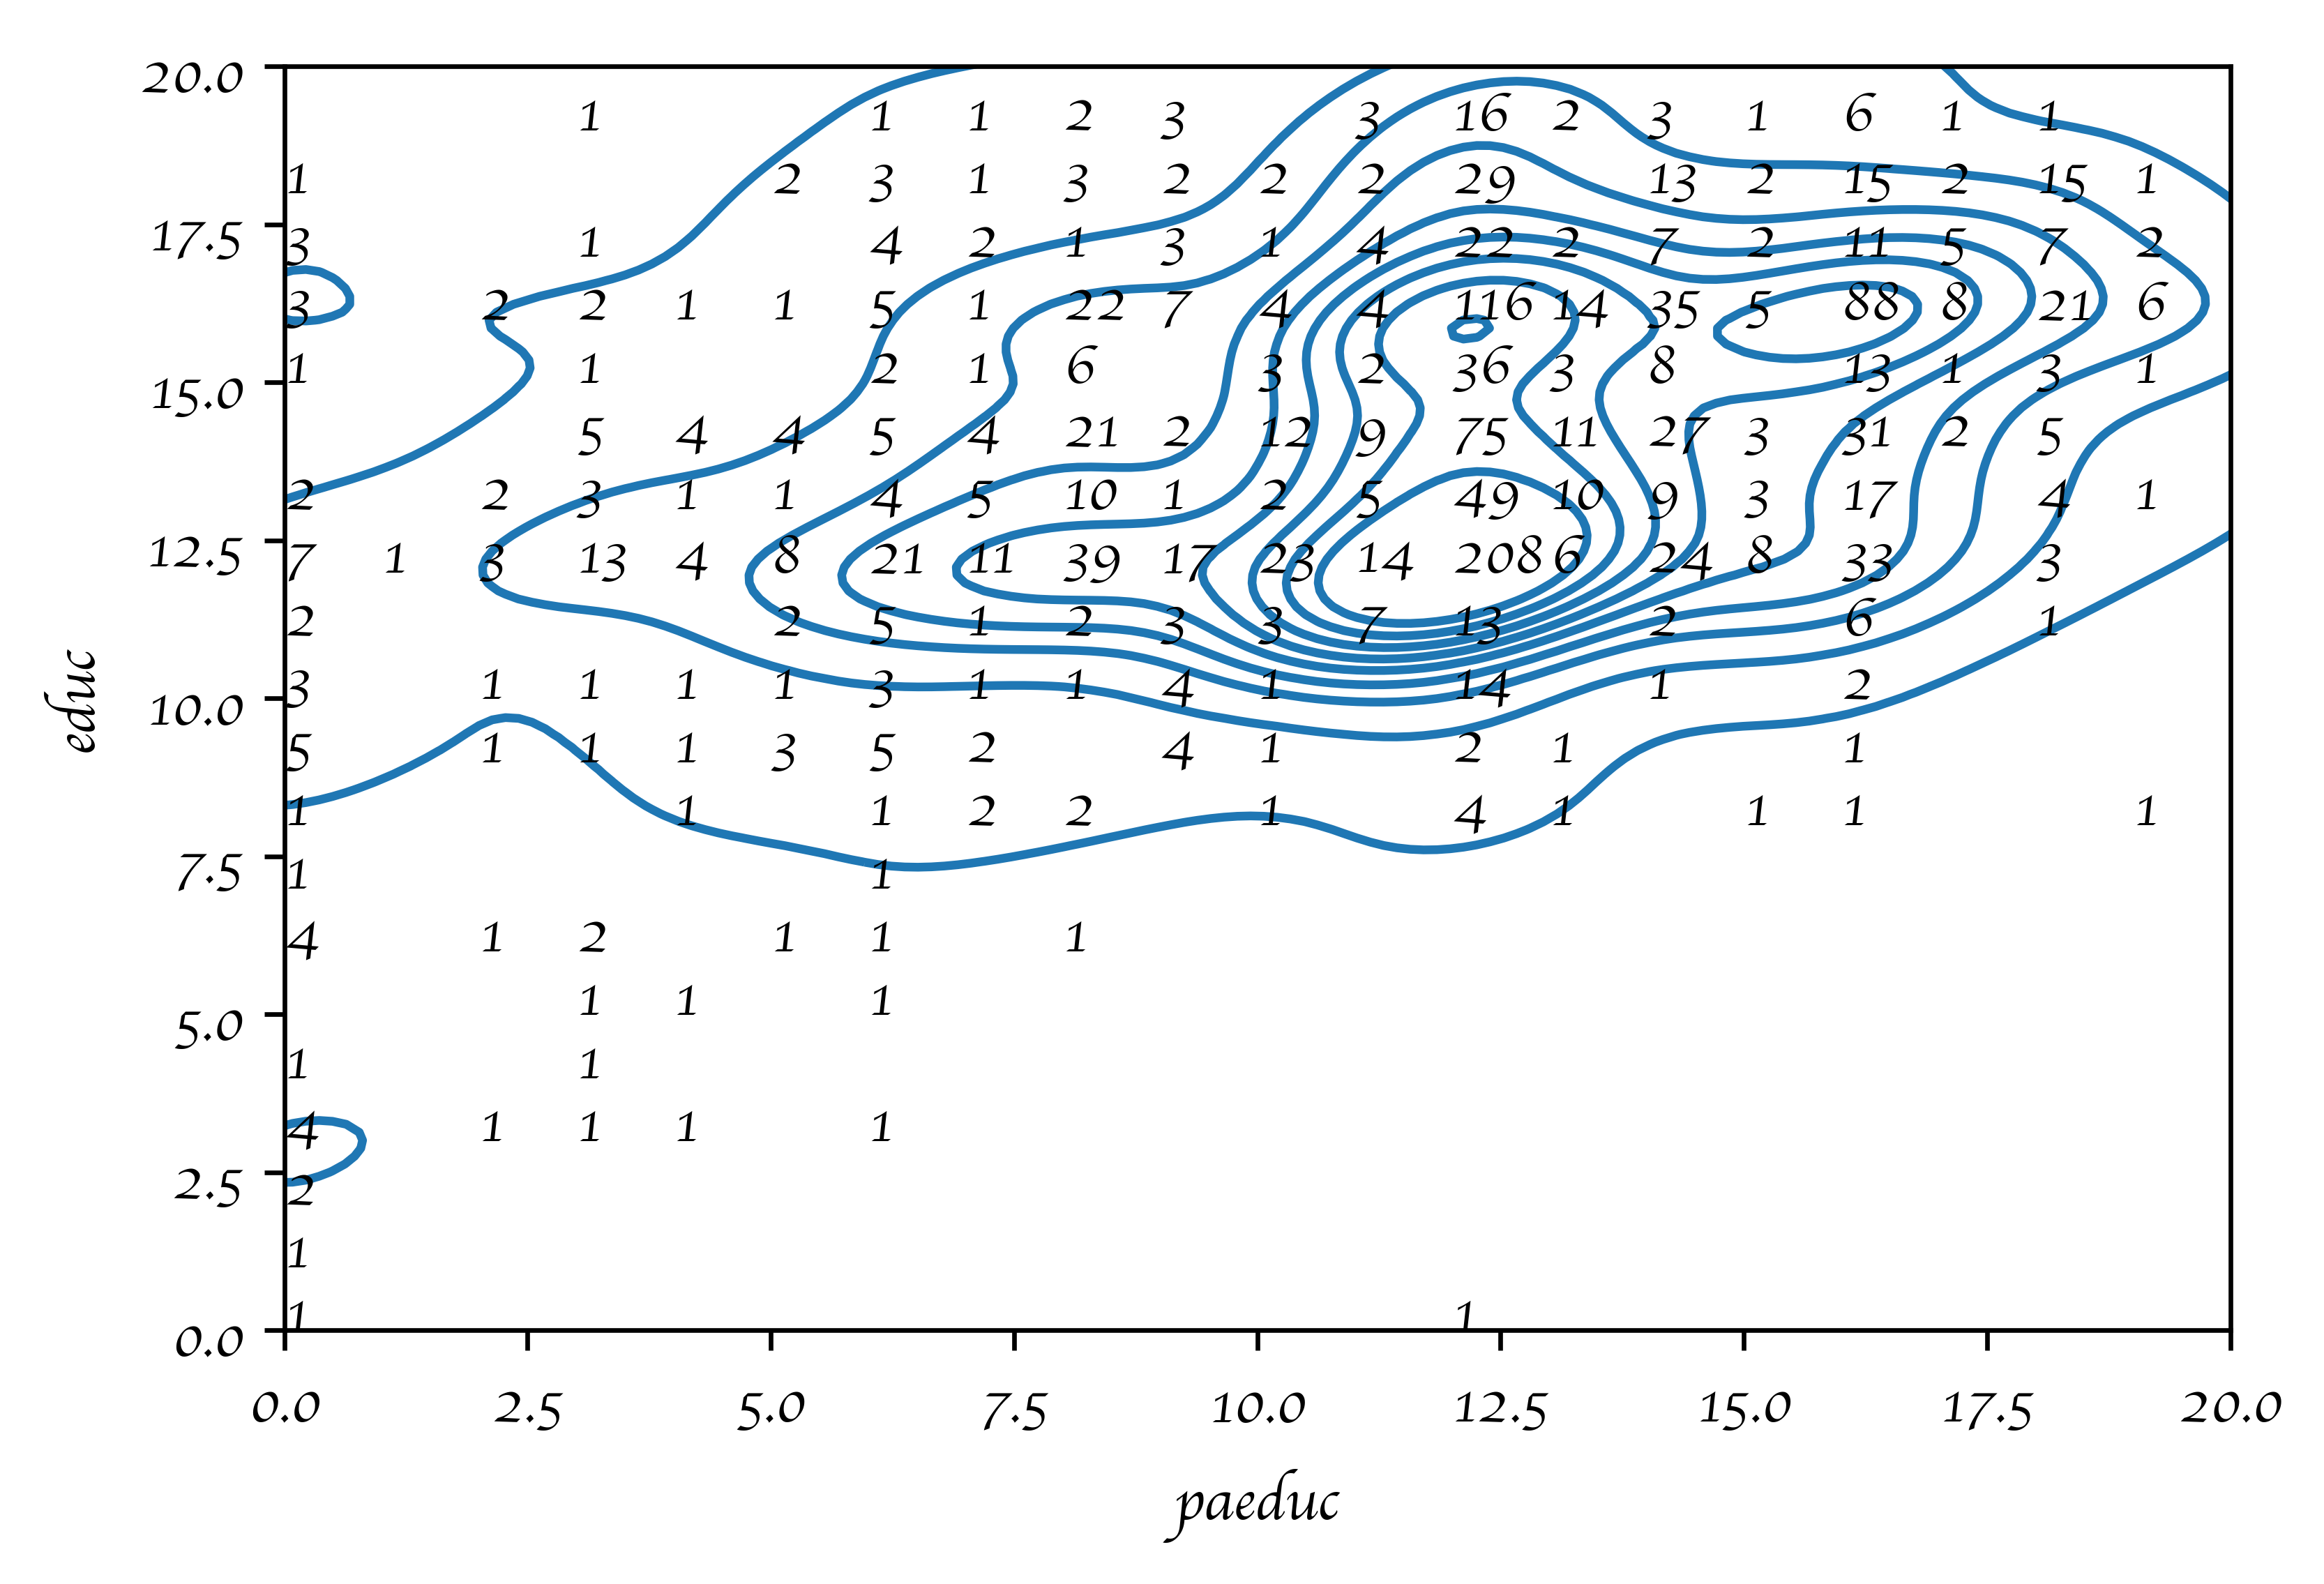

In [92]:
#GSS example
#but omitting zeros
abscissa = GSS["paeduc"]
ordinate = GSS["educ"]
xmin = int(np.min(abscissa))
xmax = int(np.max(abscissa))
ymin = int(np.min(ordinate))
ymax = int(np.max(ordinate))        


plt.rcParams["font.family"] = "cursive"
fig, ax = plt.subplots(dpi=600)
sns.kdeplot(x=abscissa, y=ordinate)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)
for i in range (xmin, xmax):
    for j in range(ymin, ymax):
        dens = sum((GSS["paeduc"] == i) & (GSS["educ"] == j))
        if dens > 0:
            dens = str(sum((GSS["paeduc"] == i) & (GSS["educ"] == j)))
            ax.annotate(dens, xy =(i, j), fontsize=10)



,Father,Mother,Height,Kids,midparentheight
count,898.000000,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,66.760690,6.135857,69.222007
std,2.470256,2.307025,3.582918,2.685156,1.817757
min,62.000000,58.000000,56.000000,1.000000,64.400000
25%,68.000000,63.000000,64.000000,4.000000,68.060000
50%,69.000000,64.000000,66.500000,6.000000,69.270000
75%,71.000000,65.500000,69.700000,8.000000,70.160000
max,78.500000,70.500000,79.000000,15.000000,75.430000


(56.0, 79.0)

(64.0, 75.0)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

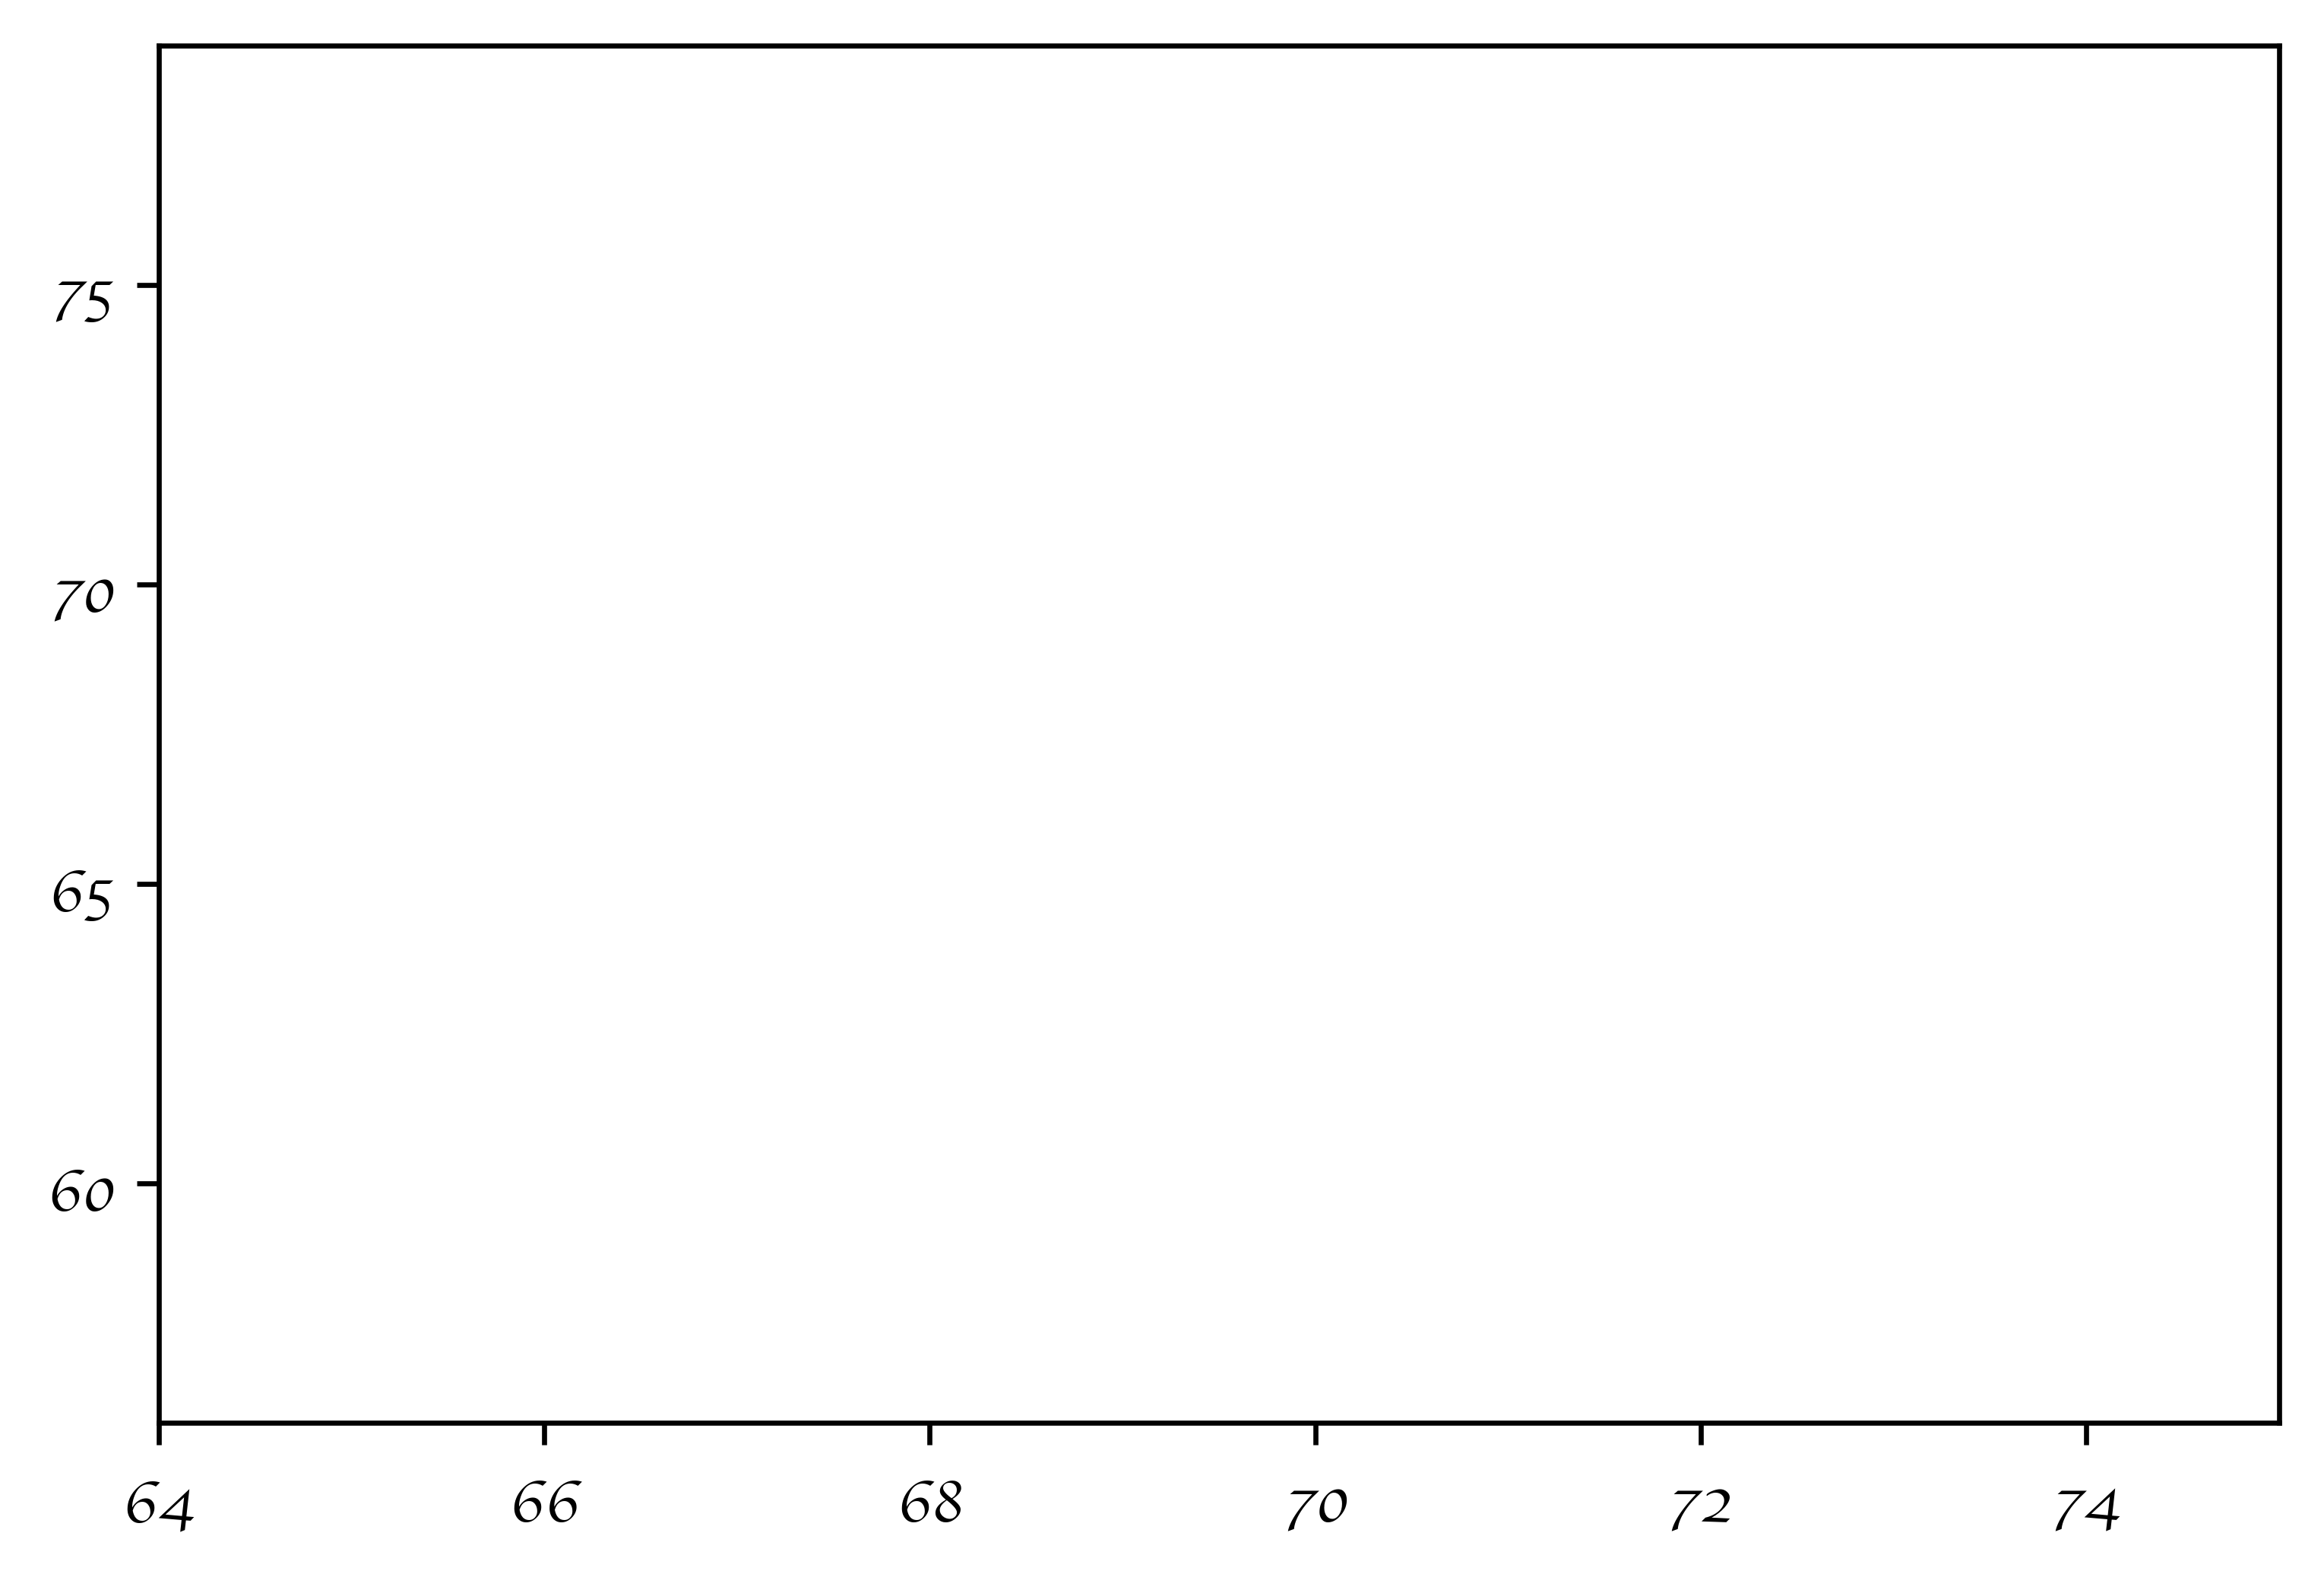

In [86]:
#Galton example
galton.describe()
galton["midparentheight"] = (galton["Father"] + 1.08*galton["Mother"])/2
abscissa = galton["midparentheight"]
ordinate = galton["Height"]
xmin = int(np.min(abscissa))
xmax = int(np.max(abscissa))
ymin = int(np.min(ordinate))
ymax = int(np.max(ordinate))

plt.rcParams["font.family"] = "cursive"
fig, ax = plt.subplots(dpi=600)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)
for i in range(xmin, xmax):
    for j in range(ymin, ymax):
        xrangelower = i - 1
        xrangeupper = i + 1
        dens = str(sum((xrangelower < abscissa < xrangeupper)) & (j-1 < ordinate < j + 1))
        ax.annotate(dens, xy =(i, j), fontsize=10)